Import Part

In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot
from scipy import stats
from pandas import DataFrame

Const

In [2]:
FILES_FOLDER_PATH = 'files_cambridgeshire_bedfordshire'
FILE_NAME = 'cambridgeshire_bedfordshire.csv'

Functions

In [3]:
def remove_outliers(df: DataFrame):
    Q1 = np.percentile(df['wqi'], 25,
                   interpolation = 'midpoint')
 
    Q3 = np.percentile(df['wqi'], 75,
                    interpolation = 'midpoint')
    IQR = Q3 - Q1
    ''' Removing the Outliers '''
    df = df[(df['wqi'] > (Q1 - 1.5 * IQR)) & (df['wqi'] < (Q3 + 1.5 * IQR))]
    return df

Loading dataset

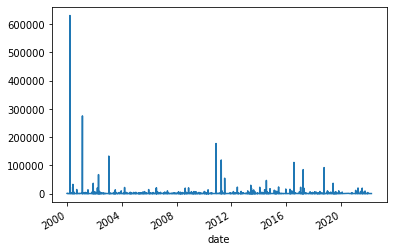

In [4]:
df = pd.read_csv(os.path.join(FILES_FOLDER_PATH, FILE_NAME), header=0, index_col=0)
df.index = pd.to_datetime(df.index)
df = df.sort_values('date', ascending=True)
df['wqi'].plot()
pyplot.show()

Removing outliers

In [5]:
df = remove_outliers(df)
df

,temp_water,ammonia,nitrate,lead,iron,pH,turbidity,oxygen_diss,conductivity,chromium,wqi
date,,,,,,,,,,,
2000-01-05,5.34,0.54,10.40,1.73,540.00,7.95,5.38,10.62,1219.09,1.67,247.86
2000-01-06,8.02,0.13,11.20,1.43,596.67,7.97,3.79,11.50,990.82,1.00,68.00
2000-01-07,5.43,0.41,8.50,2.00,335.00,8.12,16.97,12.06,1722.86,0.67,200.36
2000-01-11,6.51,0.10,12.03,1.02,245.00,8.08,4.55,11.64,910.70,0.98,55.27
2000-01-12,5.60,0.46,11.10,1.02,90.00,8.24,6.06,10.90,1473.75,2.33,213.76
...,...,...,...,...,...,...,...,...,...,...,...
2022-03-18,7.73,0.27,13.35,2.00,335.00,8.11,6.05,11.33,836.33,0.67,131.00
2022-03-21,6.20,0.03,7.38,2.00,335.00,7.98,6.05,9.96,879.28,0.67,24.43
2022-03-22,8.64,0.10,9.53,2.00,335.00,7.98,6.05,9.96,879.28,0.67,55.47


Showing trend

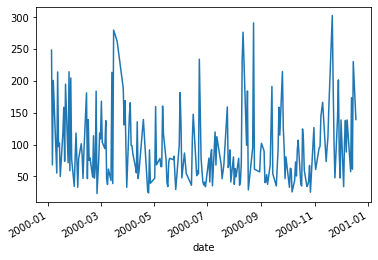

In [6]:
df_2000 = df.loc['2000-01-01' : '2000-12-31']
df_2000['wqi'].plot()
pyplot.show()

Train/test split

Observations: 4452
Training Observations: 3561
Testing Observations: 891


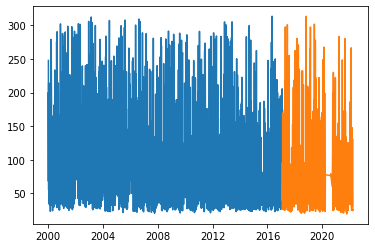

In [7]:
values = df['wqi'].values
dates = df.index.values
train_size = int(len(values) * 0.8)
train, test = values[0:train_size], values[train_size:len(values)]
train_dates, test_dates = dates[0:train_size], dates[train_size:len(dates)]
print('Observations: %d' % (len(values)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

pyplot.plot(train_dates, train)
pyplot.plot(dates, np.asanyarray([None for i in train] + [x for x in test], dtype=object))
pyplot.show()

Lag analysis

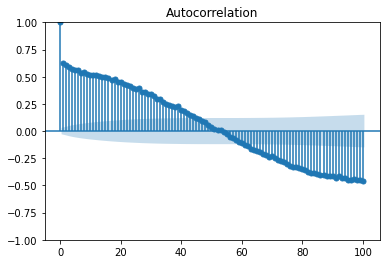

In [8]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['oxygen_diss'], lags=100)
pyplot.show()

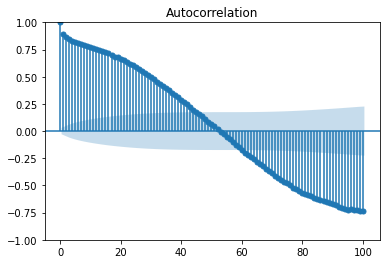

In [9]:
plot_acf(df['temp_water'], lags=100)
pyplot.show()

Sliding window

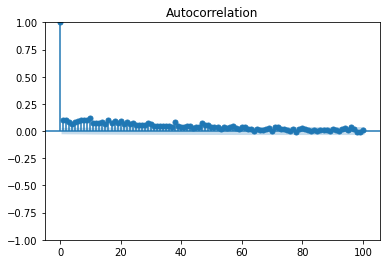

In [10]:
plot_acf(df['wqi'], lags=100)
pyplot.show()

In [11]:
STEP = 4
values = DataFrame(df.values)
dataframe = DataFrame()
dataframe = pd.concat([values.shift(i) for i in range(STEP, -1, -1)], axis=1)
columns = []
for i in range(STEP, -1, -1):
    t = f"t-{i}" if i != 0 else "t"
    columns.extend([f"{t}-x{j}" for j in range(1, len(df.columns) + 1)])

columns = columns[:-1] + ["y"]
dataframe.columns = columns 
dataframe.to_csv('lags_features.csv', index=False)
dataframe = dataframe.dropna()
dataframe.head(13)

,t-4-x1,t-4-x2,t-4-x3,t-4-x4,t-4-x5,t-4-x6,t-4-x7,t-4-x8,t-4-x9,t-4-x10,...,t-x2,t-x3,t-x4,t-x5,t-x6,t-x7,t-x8,t-x9,t-x10,y
4,5.34,0.54,10.40,1.73,540.00,7.95,5.38,10.62,1219.09,1.67,...,0.46,11.10,1.02,90.0,8.24,6.06,10.90,1473.75,2.33,213.76
5,8.02,0.13,11.20,1.43,596.67,7.97,3.79,11.50,990.82,1.00,...,0.18,8.50,1.85,230.0,7.98,15.14,10.43,1030.33,1.00,96.88
6,5.43,0.41,8.50,2.00,335.00,8.12,16.97,12.06,1722.86,0.67,...,0.21,11.92,0.97,285.0,8.14,3.84,10.81,1107.50,1.08,102.28
7,6.51,0.10,12.03,1.02,245.00,8.08,4.55,11.64,910.70,0.98,...,0.08,8.50,2.00,335.0,8.20,9.80,9.96,915.50,0.67,50.03
8,5.60,0.46,11.10,1.02,90.00,8.24,6.06,10.90,1473.75,2.33,...,0.24,12.87,1.44,290.0,8.08,8.13,11.15,937.50,1.07,118.69
9,6.33,0.18,8.50,1.85,230.00,7.98,15.14,10.43,1030.33,1.00,...,0.33,8.50,4.19,335.0,8.04,7.89,10.74,1386.27,1.38,158.25
10,4.84,0.21,11.92,0.97,285.00,8.14,3.84,10.81,1107.50,1.08,...,0.14,10.60,1.00,335.0,8.09,6.69,11.32,1048.86,1.00,73.82
11,11.48,0.08,8.50,2.00,335.00,8.20,9.80,9.96,915.50,0.67,...,0.41,14.68,1.00,335.0,7.80,11.78,9.82,1018.33,1.00,194.58
12,5.13,0.24,12.87,1.44,290.00,8.08,8.13,11.15,937.50,1.07,...,0.14,9.23,1.41,167.5,8.14,2.91,11.28,868.60,3.77,71.35
13,5.68,0.33,8.50,4.19,335.00,8.04,7.89,10.74,1386.27,1.38,...,0.46,11.00,1.28,110.0,8.09,6.44,11.46,1130.21,1.50,213.98
